# 1.) Pull in Data and Convert ot Monthly

In [81]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [83]:
df.head()

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


In [84]:
# Add a column of a Difference in stock price
df["Diff"] = df["Adj Close"].diff().shift(-1)

#Target
df["Target"] = np.sign(df["Diff"])

#Premium 
df["Premium"] = 0.08* df["Adj Close"]

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [86]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [87]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [88]:
#fit a log reg
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [89]:
y_pred = logreg.predict(X)

In [90]:
df["Predictions"] = y_pred

In [91]:
df["Profits"] = 0

In [92]:
#True Positive Profits 
df.loc[(df["Target"] == 1) & (df["Predictions"] == 1 ), "Profits"] = df["Premium"]

#False Positive Profits
df.loc[(df["Target"] == -1) & (df["Predictions"] == 1 ), "Profits"] = (100*df["Diff"]) + df["Premium"]

# 5.) Plot profits over time

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

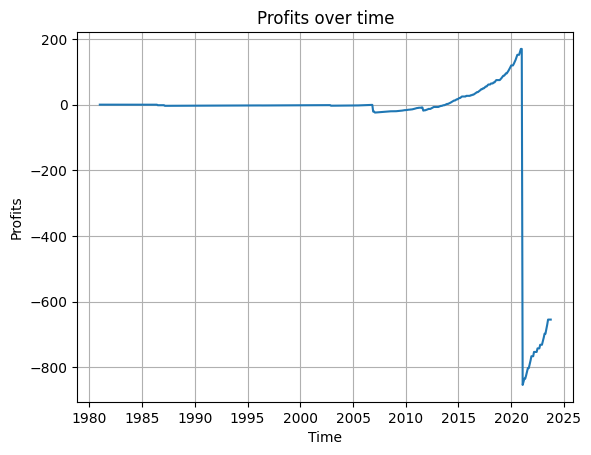

In [94]:
plt.plot(np.cumsum(df["Profits"]))
plt.grid()
plt.title("Profits over time") 
plt.xlabel("Time")
plt.ylabel("Profits")
plt.plot

# 5.5) Short write up about how you see your skills are valuable for the presented companies

I am intrigued by the concept of the Arena App, SocialFi platform that connects people who have similar interests. Despite my current lack of interest in the cryptocurrency domain, my enthusiasm lies in analyzing user behaviors. I think in my ability to make a significant contribution in this area. 